## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer= keras.optimizers.rmsprop(lr=regulizer_ratio)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0726 21:19:23.010338 4622157248 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0726 21:19:23.011806 4622157248 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 21:19:23.027091 4622157248 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 21:19:23.027938 4622157248 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 21:19:23.030806 46

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0726 21:19:23.275351 4622157248 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 125us/step - loss: 6.2157 - acc: 0.1013 - val_loss: 2.6426 - val_acc: 0.0997
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 3.2175 - acc: 0.1023 - val_loss: 2.5453 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.7191 - acc: 0.1014 - val_loss: 2.7364 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.7365 - acc: 0.0997 - val_loss: 2.7367 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.7365 - acc: 0.0992 - val_loss: 2.7363 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.7365 - acc: 0.0975 - val_loss: 2.7362 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.7364 - acc: 0.1014 - val_loss: 2.7362 - 

Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9048 - acc: 0.3656 - val_loss: 1.8326 - val_acc: 0.3804
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8170 - acc: 0.3945 - val_loss: 1.8044 - val_acc: 0.3997
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7607 - acc: 0.4134 - val_loss: 1.7377 - val_acc: 0.4150
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7197 - acc: 0.4294 - val_loss: 1.7504 - val_acc: 0.4093
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6820 - acc: 0.4421 - val_loss: 1.7320 - val_acc: 0.4109
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6509 - acc: 0.4547 - val_loss: 1.7255 - val_acc: 0.4240
Epoch 8/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6242 - acc: 0.4652 - val_loss: 1.6696 - val_acc: 0.4474
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 111us/step - loss: 2.3539 - acc: 0.0887 - val_loss: 2.3515 - val_acc: 0.0877
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.3518 - acc: 0.0892 - val_loss: 2.3494 - val_acc: 0.0890
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3498 - acc: 0.0900 - val_loss: 2.3473 - val_acc: 0.0900
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3477 - acc: 0.0904 - val_loss: 2.3453 - val_acc: 0.0904
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3458 - acc: 0.0911 - val_loss: 2.3433 - val_acc: 0.0907
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.3438 - acc: 0.0917 - val_loss: 2.3414 - val_acc: 0.0919
Epoch 9/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3419 - acc: 0.0924 - val_loss: 2.3395 - val_acc: 0.0934
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 115us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 9/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 10/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.4356 - acc: 0.1202 - val_loss: 2.4396 - val_acc: 0.1183
Epoch 11/50
50000/50000 [===================

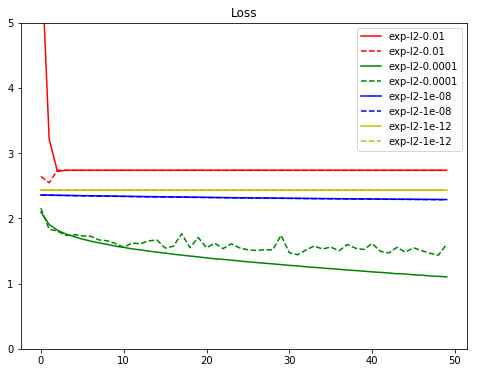

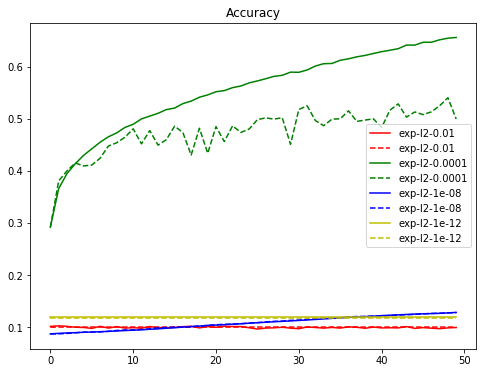

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()